In [2]:
pip install geopandas


  Obtaining dependency information for geopandas from https://files.pythonhosted.org/packages/c4/64/7d344cfcef5efddf9cf32f59af7f855828e9d74b5f862eddf5bfd9f25323/geopandas-1.0.1-py3-none-any.whl.metadata
  Obtaining dependency information for pyogrio>=0.7.2 from https://files.pythonhosted.org/packages/9d/66/ddb1c74c06c858ddbe889c68fea177d1d9c711af553d355417bdef8eaf17/pyogrio-0.9.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for pyproj>=3.3.0 from https://files.pythonhosted.org/packages/79/95/eb68113c5b5737c342bde1bab92705dabe69c16299c5a122616e50f1fbd6/pyproj-3.6.1-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for shapely>=2.0.0 from https://files.pythonhosted.org/packages/ec/1b/092fff53cbeced411eed2717592e31cadd3e52f0ebaba5f2df3f34913f96/shapely-2.0.5-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/323.6 kB ? eta -:--:--
   - -------------------------------------- 10.2/323.6 kB ? eta -:--:--
   -------

In [3]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

In [7]:
df = pd.read_csv("E:\\VCU\\Summer 2024\\Statistical Analysis & Modeling\\NSSO68.csv", low_memory=False)
display(df)

,slno,grp,Round_Centre,FSU_number,Round,Schedule_Number,Sample,Sector,state,State_Region,...,pickle_v,sauce_jam_v,Othrprocessed_v,Beveragestotal_v,foodtotal_v,foodtotal_q,state_1,Region,fruits_df_tt_v,fv_tot
0,1,4.10E+31,1,41000,68,10,1,2,24,242,...,0.0,0.0,0.0,0.000000,1141.492400,30.942394,GUJ,2,12.000000,154.180000
1,2,4.10E+31,1,41000,68,10,1,2,24,242,...,0.0,0.0,0.0,17.500000,1244.553500,29.286153,GUJ,2,333.000000,484.950000
2,3,4.10E+31,1,41000,68,10,1,2,24,242,...,0.0,0.0,0.0,0.000000,1050.315400,31.527046,GUJ,2,35.000000,214.840000
3,4,4.10E+31,1,41000,68,10,1,2,24,242,...,0.0,0.0,0.0,33.333333,1142.591667,27.834607,GUJ,2,168.333333,302.300000
4,5,4.10E+31,1,41000,68,10,1,2,24,242,...,0.0,0.0,0.0,75.000000,945.249500,27.600713,GUJ,2,15.000000,148.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101657,101658,8.00E+31,1,79998,68,10,1,1,1,12,...,0.0,0.0,0.0,0.000000,544.013667,28.441750,J$K,2,0.000000,25.833333
101658,101659,8.00E+31,1,79998,68,10,1,1,1,12,...,0.0,0.0,0.0,8.000000,417.616600,25.490282,J$K,2,0.000000,49.000000
101659,101660,8.00E+31,1,79998,68,10,1,1,1,12,...,0.0,0.0,0.0,7.142857,378.300429,25.800107,J$K,2,0.000000,32.285714
101660,101661,8.00E+31,1,79998,68,10,1,1,1,12,...,0.0,0.0,0.0,14.000000,510.023600,30.220170,J$K,2,0.000000,39.200000


In [8]:
KE = df[df['state_1']=="KE"]

In [9]:
KE.isnull().sum().sort_values(ascending = False)

soyabean_q             4459
soyabean_v             4459
Meals_School           4408
Land_Leased_out        4371
Otherwise_possessed    4312
                       ... 
radish_q                  0
brinjal_q                 0
tamato_q                  0
onion_q                   0
fv_tot                    0
Length: 384, dtype: int64

In [10]:
df.columns

Index(['slno', 'grp', 'Round_Centre', 'FSU_number', 'Round', 'Schedule_Number',
       'Sample', 'Sector', 'state', 'State_Region',
       ...
       'pickle_v', 'sauce_jam_v', 'Othrprocessed_v', 'Beveragestotal_v',
       'foodtotal_v', 'foodtotal_q', 'state_1', 'Region', 'fruits_df_tt_v',
       'fv_tot'],
      dtype='object', length=384)

In [11]:
KE_new = KE[['state_1', 'District', 'Sector','Region','State_Region','ricetotal_q','wheattotal_q','moong_q','Milktotal_q','chicken_q','bread_q','foodtotal_q','Beveragestotal_v','Meals_At_Home']]

In [12]:
KE_new.isnull().sum().sort_values(ascending = False)

Meals_At_Home       104
state_1               0
District              0
Sector                0
Region                0
State_Region          0
ricetotal_q           0
wheattotal_q          0
moong_q               0
Milktotal_q           0
chicken_q             0
bread_q               0
foodtotal_q           0
Beveragestotal_v      0
dtype: int64

In [13]:
KE_clean = KE_new.copy()

In [14]:
KE_clean.loc[:, 'Meals_At_Home'] = KE_clean['Meals_At_Home'].fillna(KE_new['Meals_At_Home'].mean())

In [15]:
KE_clean.isnull().any()

state_1             False
District            False
Sector              False
Region              False
State_Region        False
ricetotal_q         False
wheattotal_q        False
moong_q             False
Milktotal_q         False
chicken_q           False
bread_q             False
foodtotal_q         False
Beveragestotal_v    False
Meals_At_Home       False
dtype: bool

In [66]:
# Function to remove outliers
def remove_outliers(df, column_name):
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_threshold = Q1 - (1.5 * IQR)
    upper_threshold = Q3 + (1.5 * IQR)
    df = df[(df[column_name] >= lower_threshold) & (df[column_name] <= upper_threshold)]
    return df

In [70]:
outlier_columns = ['ricetotal_q']
for col in outlier_columns:
    KE_clean = remove_outliers(KE_clean, col)

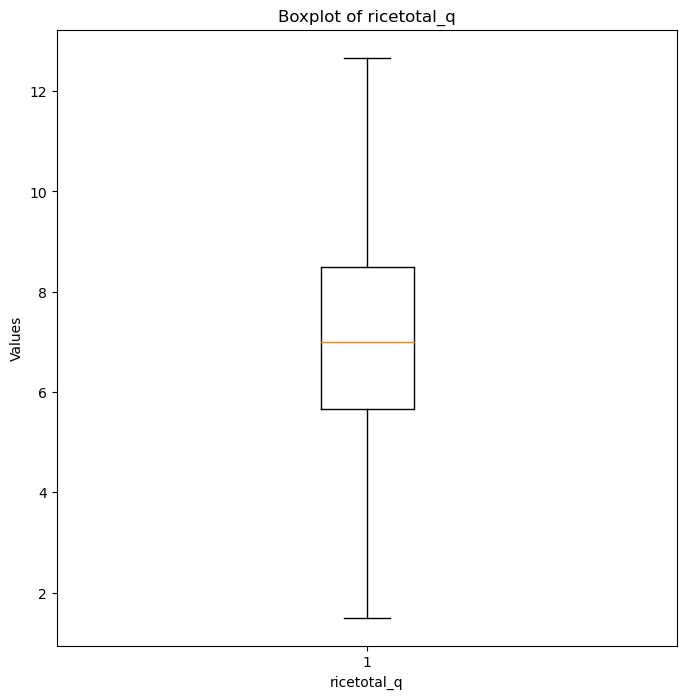

In [71]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 8))
plt.boxplot(KE_clean['ricetotal_q'])
plt.xlabel('ricetotal_q')
plt.ylabel('Values')
plt.title('Boxplot of ricetotal_q')
plt.show()

In [72]:
rice1 = KE_clean['ricetotal_q'].quantile(0.25)
rice2 = KE_clean['ricetotal_q'].quantile(0.75)
iqr_rice = rice2-rice1
up_limit = rice2 + 1.5*iqr_rice
low_limit = rice1 - 1.5*iqr_rice

In [73]:
KE_clean=KE_new[(KE_new['ricetotal_q']<=up_limit)&(KE_new['ricetotal_q']>=low_limit)]

{'whiskers': [<matplotlib.lines.Line2D at 0x1694ebd4ed0>,
 'caps': [<matplotlib.lines.Line2D at 0x1694ebd5910>,
 'boxes': [<matplotlib.lines.Line2D at 0x1694ebd4510>],
 'medians': [<matplotlib.lines.Line2D at 0x1694ebd6fd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1694ebd7890>],
 'means': []}

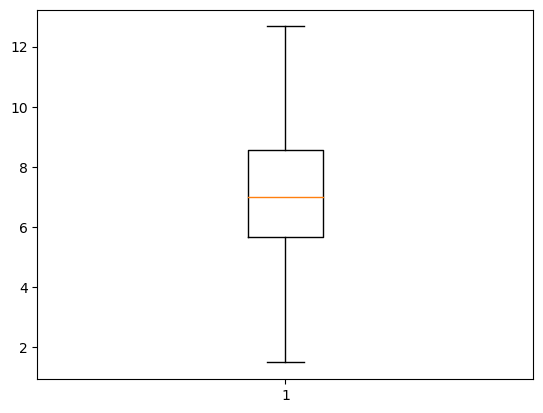

In [74]:
plt.boxplot(KE_clean['ricetotal_q'])

In [20]:
KE_clean['District'].unique()

array([ 5,  4,  6,  2,  3,  1,  7, 12, 11, 10, 13,  9, 14,  8],
      dtype=int64)

In [21]:
KE_clean.loc[:,'Sector'] = KE_clean['Sector'].replace([1, 2], ['URBAN', 'RURAL'])

In [22]:
KE_clean.columns

Index(['state_1', 'District', 'Sector', 'Region', 'State_Region',
       'ricetotal_q', 'wheattotal_q', 'moong_q', 'Milktotal_q', 'chicken_q',
       'bread_q', 'foodtotal_q', 'Beveragestotal_v', 'Meals_At_Home'],
      dtype='object')

In [23]:
KE_clean.loc[:, 'total_consumption'] = KE_clean[['ricetotal_q', 'wheattotal_q', 'moong_q', 'Milktotal_q', 'chicken_q', 'bread_q', 'foodtotal_q', 'Beveragestotal_v']].sum(axis=1)

C:\Users\Ferah Shan\AppData\Local\Temp\ipykernel_26552\1189263288.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  KE_clean.loc[:, 'total_consumption'] = KE_clean[['ricetotal_q', 'wheattotal_q', 'moong_q', 'Milktotal_q', 'chicken_q', 'bread_q', 'foodtotal_q', 'Beveragestotal_v']].sum(axis=1)


In [24]:
KE_clean.head()

,state_1,District,Sector,Region,State_Region,ricetotal_q,wheattotal_q,moong_q,Milktotal_q,chicken_q,bread_q,foodtotal_q,Beveragestotal_v,Meals_At_Home,total_consumption
23436,KE,5,RURAL,1,321,6.000000,0.666667,0.116667,0,0.666667,0.133333,19.050792,25.010000,NaN,51.644125
23437,KE,5,RURAL,1,321,11.500000,1.500000,0.250000,0,1.125000,0.400000,35.461440,0.013000,89.0,50.249440
23438,KE,5,RURAL,1,321,5.833333,0.333333,0.041667,0,1.000000,0.000000,17.883801,25.002500,90.0,50.094634
23439,KE,5,RURAL,1,321,12.500000,1.500000,0.250000,0,1.000000,0.200000,30.801360,15.009000,77.0,61.260360
23440,KE,5,RURAL,1,321,4.333333,0.500000,0.125000,0,0.333333,0.133333,14.007304,9.171667,88.0,28.603971


In [28]:
KE_clean.loc[:,"District"] = KE_clean.loc[:,"District"].replace({1: "Kasargod", 2: "Kannur", 3: "Wayanad", 4: "Kozhikode", 5: "Malappuram", 6: "Palakkad", 7: "Thrissur", 8: "Ernakulam", 9: "Idukki", 10: "Kottayam", 11: "Alappuzha", 12: "Pathanamthitta", 13: "Kollam", 14: "Thiruvananthapuram"})

In [32]:
KE_clean.loc[:,"Region"] = KE_clean.loc[:,"Region"].replace({1: "Rural", 2: "Urban"})

In [33]:
KE_clean.groupby('Region').agg({'total_consumption':['std','mean','max','min']})

total_consumption                                 
                     std       mean         max       min
Region                                                   
Rural          32.004928  53.622822  374.451750  7.750370
Urban          36.368818  54.042007  596.432225  6.494883

In [34]:
KE_clean.groupby('District').agg({'total_consumption':['std','mean','max','min']})

total_consumption                                  
                                 std       mean         max        min
District                                                              
Alappuzha                  29.823326  49.341860  319.750675  12.540515
Ernakulam                  38.245347  53.257585  327.858302  11.750345
Idukki                     28.144681  48.194248  178.241330  10.425100
Kannur                     33.872072  52.727033  274.244757   8.400200
Kasargod                   31.298825  46.890964  170.434622   8.462613
Kollam                     33.644504  55.813456  219.579125   9.188136
Kottayam                   34.123914  55.437439  211.526644  16.013044
Kozhikode                  28.927522  54.271020  225.462965  11.018231
Malappuram                 26.802161  49.067186  218.999200  14.067596
Palakkad                   39.462513  63.874202  374.451750   7.750370
Pathanamthitta             30.310010  54.431815  209.032693  14.212681
Thiruvananthapuram         48.841128  59.177433  596.432225   6.494883
Thrissur                   30.101145  52.312986  291.787575  11.930255
Wayanad                    20.952727  50.339046  126.700855  15.400162

In [37]:
total_consumption_by_districtname=KE_clean.groupby('District')['total_consumption'].sum()

In [38]:
total_consumption_by_districtname.sort_values(ascending=False).head(3)

District
Thiruvananthapuram    25801.361002
Kozhikode             22359.660098
Thrissur              21657.576368
Name: total_consumption, dtype: float64

In [39]:
total_consumption_by_districtname.sort_values(ascending=True).head(3)

District
Wayanad     6141.363590
Idukki      6939.971682
Kasargod    8862.392169
Name: total_consumption, dtype: float64

In [43]:
KE_clean['District'] = KE_clean['District'].astype(str)
KE_clean['Sector'] = KE_clean['Sector'].astype(str)
print(KE_clean.head())

      state_1    District Sector Region  State_Region  ricetotal_q  \
23436      KE  Malappuram  RURAL  Rural           321     6.000000   
23437      KE  Malappuram  RURAL  Rural           321    11.500000   
23438      KE  Malappuram  RURAL  Rural           321     5.833333   
23439      KE  Malappuram  RURAL  Rural           321    12.500000   
23440      KE  Malappuram  RURAL  Rural           321     4.333333   

       wheattotal_q   moong_q  Milktotal_q  chicken_q   bread_q  foodtotal_q  \
23436      0.666667  0.116667            0   0.666667  0.133333    19.050792   
23437      1.500000  0.250000            0   1.125000  0.400000    35.461440   
23438      0.333333  0.041667            0   1.000000  0.000000    17.883801   
23439      1.500000  0.250000            0   1.000000  0.200000    30.801360   
23440      0.500000  0.125000            0   0.333333  0.133333    14.007304   

       Beveragestotal_v  Meals_At_Home  total_consumption  
23436         25.010000            NaN

C:\Users\Ferah Shan\AppData\Local\Temp\ipykernel_26552\3955446648.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  KE_clean['District'] = KE_clean['District'].astype(str)
C:\Users\Ferah Shan\AppData\Local\Temp\ipykernel_26552\3955446648.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  KE_clean['Sector'] = KE_clean['Sector'].astype(str)


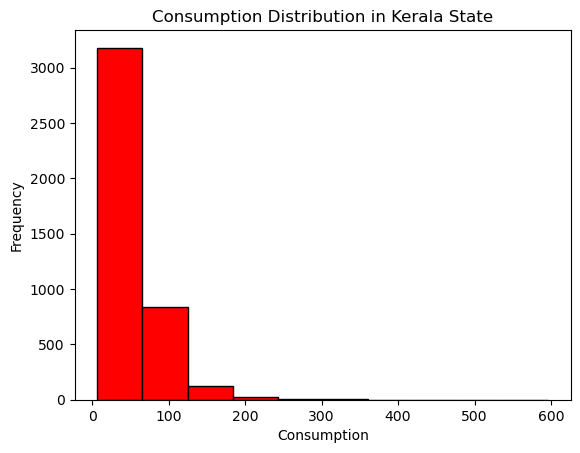

In [46]:
plt.hist(KE_clean['total_consumption'], bins=10, color='red', edgecolor='black')
plt.xlabel("Consumption")
plt.ylabel("Frequency")
plt.title("Consumption Distribution in Kerala State")
plt.show()

In [48]:
KE_clean_consumption = KE_clean.groupby('District')['total_consumption'].sum().reset_index()

In [49]:
print(KE_clean_consumption.head())

    District  total_consumption
0  Alappuzha       13618.353451
1  Ernakulam       21249.776435
2     Idukki        6939.971682
3     Kannur       19034.458984
4   Kasargod        8862.392169


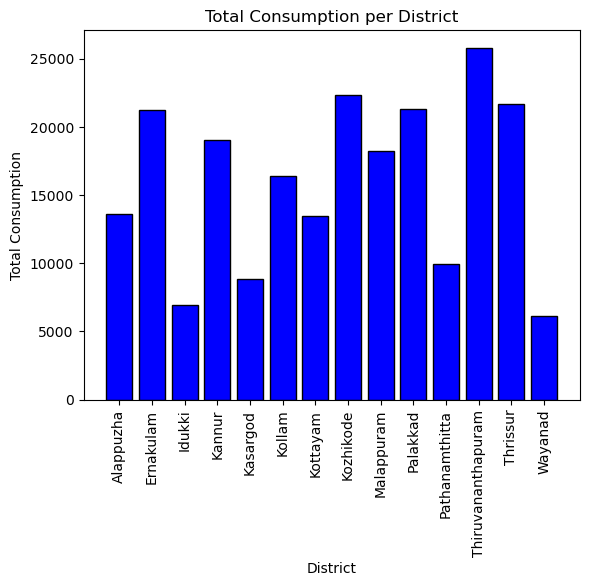

In [50]:
plt.bar(KE_clean_consumption['District'], KE_clean_consumption['total_consumption'], color='blue', edgecolor='black')
plt.xlabel("District")
plt.ylabel("Total Consumption")
plt.title("Total Consumption per District")
plt.xticks(rotation=90)  # Rotate district names for better visibility
plt.show()

In [76]:
# b) Plotting total consumption on the Kerala state map

# Filtering for Kerala
df_kl = data[data['state_1'] == "KE"]

# Sub-setting the data
kl_new = df_kl[['state_1', 'District', 'Region', 'Sector', 'State_Region', 'Meals_At_Home', 'ricetotal_q', 'Wheatpds_q', 'chicken_q', 'pulsep_q', 'wheatos_q', 'No_of_Meals_per_day']]

In [77]:
# Check for missing values in the subset
print("Missing Values in Subset:")
print(kl_new.isnull().sum())

# Impute missing values with mean for specific columns
kl_new['Meals_At_Home'].fillna(kl_new['Meals_At_Home'].mean(), inplace=True)

# Check for missing values after imputation
print("Missing Values After Imputation:")
print(kl_new.isnull().sum())

Missing Values in Subset:
state_1                  0
District                 0
Region                   0
Sector                   0
State_Region             0
Meals_At_Home          104
ricetotal_q              0
Wheatpds_q               0
chicken_q                0
pulsep_q                 0
wheatos_q                0
No_of_Meals_per_day      0
dtype: int64
Missing Values After Imputation:
state_1                0
District               0
Region                 0
Sector                 0
State_Region           0
Meals_At_Home          0
ricetotal_q            0
Wheatpds_q             0
chicken_q              0
pulsep_q               0
wheatos_q              0
No_of_Meals_per_day    0
dtype: int64


C:\Users\Ferah Shan\AppData\Local\Temp\ipykernel_26552\2573225583.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kl_new['Meals_At_Home'].fillna(kl_new['Meals_At_Home'].mean(), inplace=True)


In [78]:
# Remove outliers
for col in outlier_columns:
    kl_new = remove_outliers(kl_new, col)

In [79]:
# Summarize consumption
kl_new['total_consumption'] = kl_new[['ricetotal_q', 'Wheatpds_q', 'chicken_q', 'pulsep_q', 'wheatos_q']].sum(axis=1)

district_summary = kl_new.groupby('District')['total_consumption'].sum().reset_index().sort_values(by='total_consumption', ascending=False)
print("District Consumption Summary:")
print(district_summary)

District Consumption Summary:
    District  total_consumption
6          7        3733.288572
13        14        3683.434325
3          4        3458.208845
5          6        3175.543768
7          8        3103.929159
1          2        3041.785515
4          5        2961.629219
12        13        2568.786214
10        11        2308.463385
9         10        2135.979419
11        12        1572.523056
0          1        1342.403675
8          9        1304.195556
2          3         994.840238


In [81]:
# Mapping districts so that merging of the tables will be easier
district_mapping = {
    "1": "Kasargod", "2": "Kannur", "3": "Wayanad", "4": "Kozhikode", "5": "Malappuram", "6": "Palakkad", "7": "Thrissur", "8": "Ernakulam", "9": "Idukki", "10": "Kottayam", "11": "Alappuzha", "12": "Pathanamthitta", "13": "Kollam", "14": "Thiruvananthapuram"
}

kl_new['District'] = kl_new['District'].astype(str).map(district_mapping).fillna(kl_new['District'])
print(kl_new)

      state_1    District  Region  Sector  State_Region  Meals_At_Home  \
23436      KE  Malappuram       1       2           321      83.483812   
23437      KE  Malappuram       1       2           321      89.000000   
23438      KE  Malappuram       1       2           321      90.000000   
23439      KE  Malappuram       1       2           321      77.000000   
23440      KE  Malappuram       1       2           321      88.000000   
...       ...         ...     ...     ...           ...            ...   
65435      KE      Idukki       2       1           322      90.000000   
65436      KE      Idukki       2       1           322      87.000000   
65438      KE      Idukki       2       1           322      83.000000   
65439      KE      Idukki       2       1           322      50.000000   
65440      KE      Idukki       2       1           322      90.000000   

       ricetotal_q  Wheatpds_q  chicken_q  pulsep_q  wheatos_q  \
23436     6.000000        0.00   0.666667  0.

In [82]:
# kl_consumption stores aggregate of total consumption district-wise
kl_consumption = kl_new.groupby('District')['total_consumption'].sum().reset_index()
print(kl_consumption)

              District  total_consumption
0            Alappuzha        2308.463385
1            Ernakulam        3103.929159
2               Idukki        1304.195556
3               Kannur        3041.785515
4             Kasargod        1342.403675
5               Kollam        2568.786214
6             Kottayam        2135.979419
7            Kozhikode        3458.208845
8           Malappuram        2961.629219
9             Palakkad        3175.543768
10      Pathanamthitta        1572.523056
11  Thiruvananthapuram        3683.434325
12            Thrissur        3733.288572
13             Wayanad         994.840238


In [83]:
# Load and plot Kerala state map
data_map = gpd.read_file("C:\\Users\\Ferah Shan\\Downloads\\KERALA_DISTRICTS.geojson")

data_map = data_map.rename(columns={'dtname': 'District'})
print(data_map)

              District  stname stcode11 dtcode11 year_stat   Shape_Length  \
0            Kasaragod  KERALA       32      588    2011_c  382258.965224   
1              Wayanad  KERALA       32      590    2011_c  292261.797789   
2            Kozhikode  KERALA       32      591    2011_c  298776.567326   
3           Malappuram  KERALA       32      592    2011_c  409487.628759   
4             Palakkad  KERALA       32      593    2011_c  551293.272056   
5             Thrissur  KERALA       32      594    2011_c  397475.610728   
6               Idukki  KERALA       32      596    2011_c  570539.472994   
7            Ernakulam  KERALA       32      595    2011_c  412906.029329   
8            Alappuzha  KERALA       32      598    2011_c  299423.689877   
9             Kottayam  KERALA       32      597    2011_c  321896.971631   
10      Pathanamthitta  KERALA       32      599    2011_c  406371.586244   
11              Kollam  KERALA       32      600    2011_c  349910.199376   

In [84]:
# Merging kl_consumption and data_map tables
data_map_data = data_map.merge(kl_consumption, on='District')
print(data_map_data)

              District  stname stcode11 dtcode11 year_stat   Shape_Length  \
0              Wayanad  KERALA       32      590    2011_c  292261.797789   
1            Kozhikode  KERALA       32      591    2011_c  298776.567326   
2           Malappuram  KERALA       32      592    2011_c  409487.628759   
3             Palakkad  KERALA       32      593    2011_c  551293.272056   
4             Thrissur  KERALA       32      594    2011_c  397475.610728   
5               Idukki  KERALA       32      596    2011_c  570539.472994   
6            Ernakulam  KERALA       32      595    2011_c  412906.029329   
7            Alappuzha  KERALA       32      598    2011_c  299423.689877   
8             Kottayam  KERALA       32      597    2011_c  321896.971631   
9       Pathanamthitta  KERALA       32      599    2011_c  406371.586244   
10              Kollam  KERALA       32      600    2011_c  349910.199376   
11  Thiruvananthapuram  KERALA       32      601    2011_c  286375.498107   

In [55]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

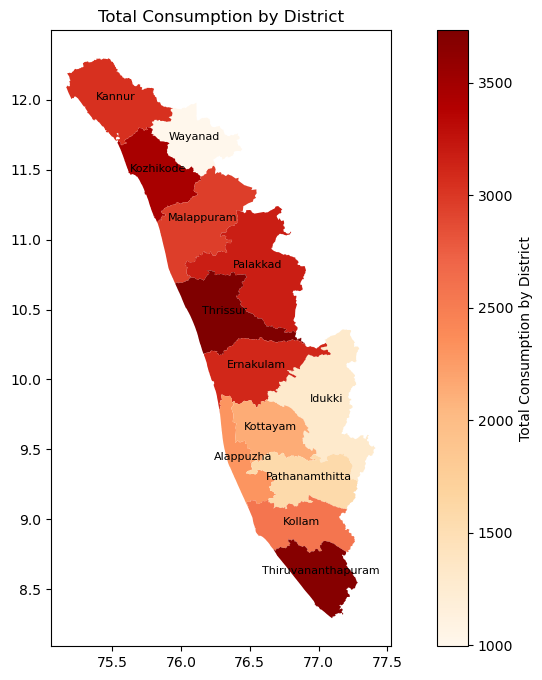

In [85]:
# Plot with labeled district names
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
data_map_data.plot(column='total_consumption', cmap='OrRd', legend=True, ax=ax, legend_kwds={'label': "Total Consumption by District"})
data_map_data.apply(lambda x: ax.annotate(text=x['District'], xy=x.geometry.centroid.coords[0], ha='center', fontsize=8, color='black'), axis=1)
plt.title('Total Consumption by District')
plt.show()